# Project: Analyzing Medical Appointment No-Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>    
</ul>

<a id='intro'></a>
## Introduction

> This <a href="https://www.kaggle.com/joniarroba/noshowappointments">dataset</a> represents appointment no-show data of 300,000 patients in Brazil. It conists of 15 features. <br />
> We are interested in analyzing the relations between a few features and no-shows by data visualization mainly, on both one and two dimensional levels. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("muted"))
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshow.csv')
df.head()
#PatientID, AppointmentID are extraneous.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print("There are", df.shape[0], "patients")

There are 110527 patients


In [4]:
df.dtypes
#I think ScheduledDay and AppointmentDay have to be converted to datetime

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
df.info()
#no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum()
#No duplicates

0

In [7]:
df.describe()
#It is illogical that the minimum age is -1

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning

##### Dropping PatientId and Appointment ID

In [9]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#### Deleting row with age = -1

In [10]:
df.drop(99832, inplace=True)

#### Convert days columns to datetime and weekday name

In [11]:
#Change Days columns to datetime
df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime) 

#Add column for week day name of the appointment
df['weekday'] = df['AppointmentDay'].dt.weekday_name

#### Renaming and correcting column names

In [12]:
df.rename(columns= {'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,weekday
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


#### Filtering no-shows and SMS

In [13]:
#Creating queries
no_show = df.query('No_show == "Yes"')
show = df.query('No_show == "No"')

received = df.query('SMS_received == 1')
not_received = df.query('SMS_received == 0')

<a id='eda'></a>
## Exploratory Data Analysis


### Percentage of Show and No-show

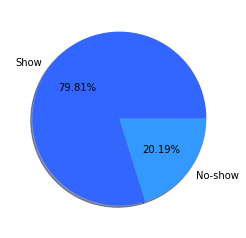

In [15]:
#Pct of show and no-show
prop_no_show = df['No_show'].value_counts()
labels = ['Show','No-show']
colors = ['#3366ff','#3399ff']
plt.pie(prop_no_show, labels=labels, autopct='%.2f%%', colors=colors, shadow=True);

### No-show Proportion of Each Gender

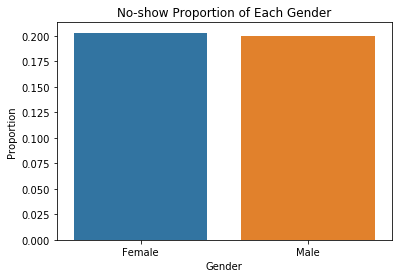

In [101]:
#No-show proportion of each gender
prop_gender = no_show.Gender.value_counts()/df.Gender.value_counts()
prop_gender.index=['Female','Male']

#Plotting a bar chart
sns.barplot(prop_gender.index, prop_gender)
plt.title("No-show Proportion of Each Gender");
plt.xlabel("Gender");
plt.ylabel("Proportion");

### SMS and No-show

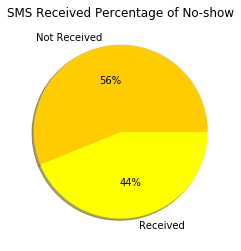

In [64]:
noshow_sms = no_show.SMS_received.value_counts()
labels = ['Not Received','Received']
colors = ['#ffcc00','#ffff00']
plt.pie(noshow_sms, labels=labels, autopct='%.f%%', colors=colors, shadow=True);
plt.title("SMS Received Percentage of No-show");

### Days and No-show

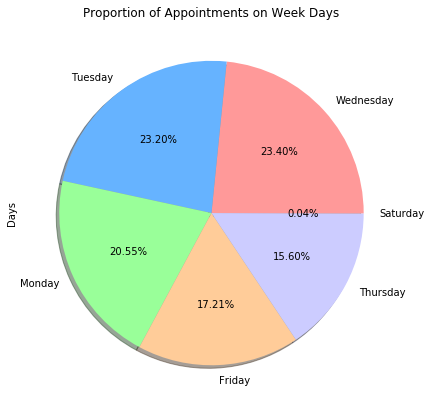

In [68]:
#Counting number of appointmentsfor each day
weekday_appointments = df.weekday.value_counts()

#Plotting piechart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ccccff']
weekday_appointments.plot.pie(figsize=(7,7),autopct='%.2f%%',shadow=True,colors=colors);
plt.title("Proportion of Appointments on Week Days");
plt.ylabel("Days");

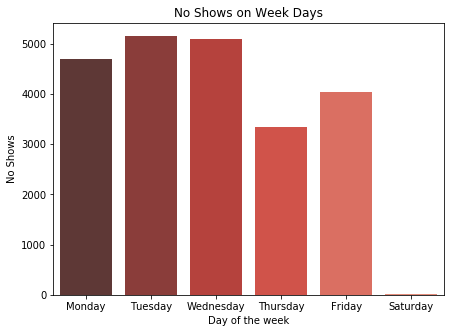

In [69]:
#Counting no-shows for each week day
noshow_weekday = no_show.weekday.value_counts()

#Plotting a bar chart
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=(7,5))
sns.barplot(x=noshow_weekday.index, y=noshow_weekday, order=order, palette="Reds_d");
plt.xlabel("Day of the week");
plt.ylabel("No Shows");
plt.title("No Shows on Week Days");

### Age and No-shows

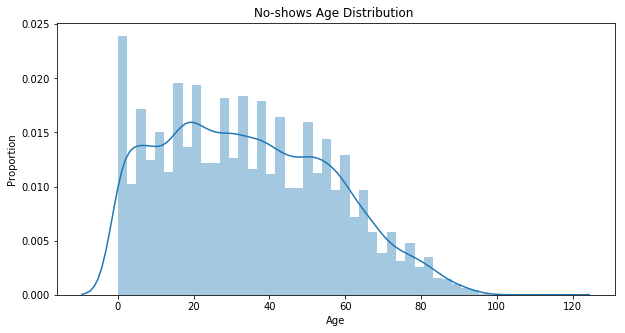

In [70]:
#Age distribution graph 
plt.figure(figsize=(10,5))
sns.distplot(no_show.Age);
plt.ylabel("Proportion");
plt.title("No-shows Age Distribution ");

In [71]:
#I chose the median because the age distibution seems to be skewed.
print("Median age of no-show is:", no_show.Age.median())
print("Median age of shows is:", show.Age.median())

Median age of no-show is: 33.0
Median age of shows is: 38.0


### Top Neighbors by Number of No-shows

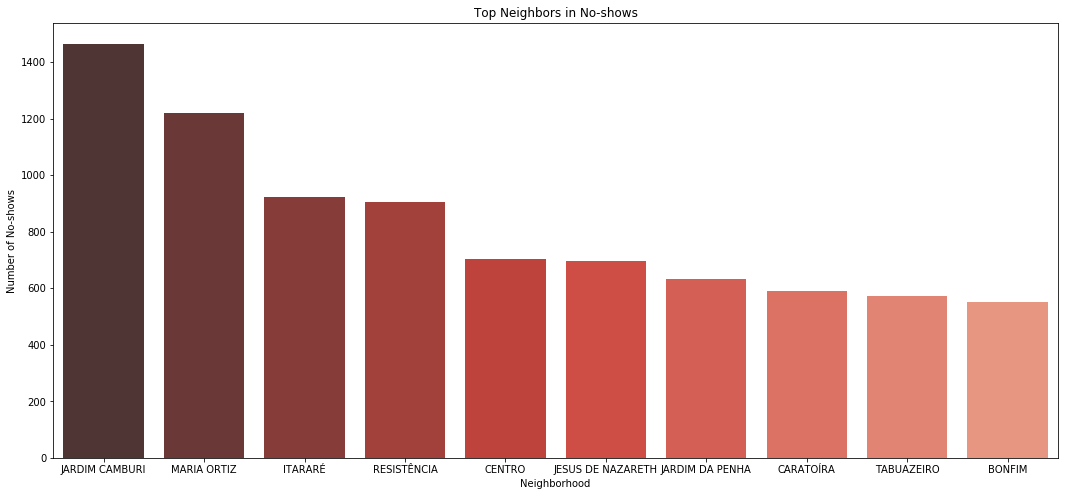

In [72]:
#Ranking neighbors based on no-shows
neighbor_rank = no_show.Neighbourhood.value_counts().nlargest(10)

#Plotting the figure
plt.figure(figsize=(18, 8))
sns.barplot(x=neighbor_rank.index, y=neighbor_rank, palette="Reds_d");
plt.xlabel("Neighborhood");
plt.ylabel("Number of No-shows");
plt.title("Top Neighbors in No-shows");

<a id='conclusions'></a>
## Conclusions

> There seem to be no difference between males and females in proportion of no-shows.

> The percentage of no-show patient that received an SMS is 44%, which might suggest that it is not a highly important feature.

> Most appointments were on Monday, Tuesday, and Wednesday, whereas the least amount of appointments was on Saturday. There are no appointments on Sunday which suggests that the hospital does not operate on that day.

> Most no-shows were on Tuesday and Wednesday. Saturday had the least amount of no-shows, but it is meaningless because Saturday accounted for 0.04% of total appointments only.

> Age distribution is skewed to the right, and the median was calculated instead of the mean to reduce the effect of outliers. The median age for no-shows is 33, whereas it is 38 for shows.

> Top neighbors in no-shows are plotted, but there aren't enough information to suggest why these neighbors scored high in no-shows. One guess is that they are far from the hospital.

> The data is collected over a short period of time, which is not enough to give an insight regarding cycles and seasonality.

> Having a feature that has the distance to the hospital from each neighbor  might be a good idea to have more accurate predictions.


<a id='references'></a>
## References
<a href="https://stackoverflow.com/a/30222759/10967064">Weekday Name Conversion</a> <br />
<a href="https://stackoverflow.com/a/40454119/10967064">Choosing Top Counts</a> <br />
<a href="https://medium.com/@vladbezden/how-to-set-seaborn-plot-size-in-jupyter-notebook-63ffb1415431">Setting Seaborn Figure Size</a> <br />
<a href="https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f">Pie Chart Customization</a> <br />
<a href="https://stackoverflow.com/a/7244958/10967064">Percentage on Pie Chart</a> <br />